In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

warnings.filterwarnings  ('ignore')

In [2]:
df = pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.0

In [10]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'quality' in numerical_cols:
    numerical_cols.remove('quality')  
    categorical_cols.append('quality') 

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']
Categorical Columns: ['quality']


In [18]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<Axes: ylabel='Density'>

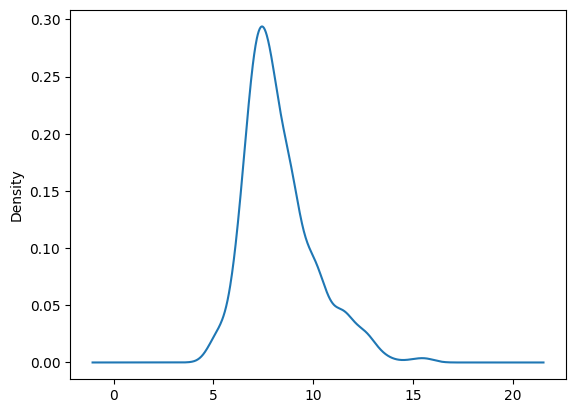

In [20]:
df['fixed acidity'].plot(kind='kde')

In [21]:
df['fixed acidity'].skew()

np.float64(1.0449299563724053)

<Axes: >

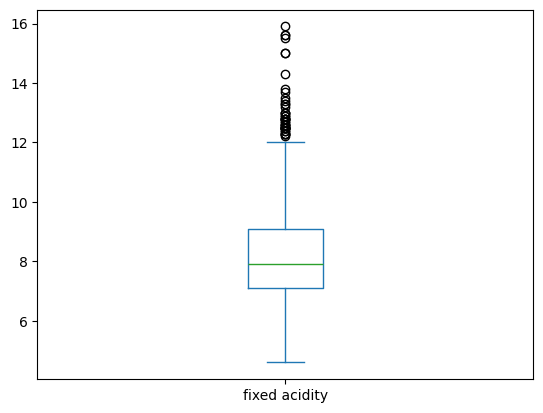

In [22]:
df['fixed acidity'].plot(kind='box')

In [23]:
a = df['fixed acidity'].mean()+df['fixed acidity'].std()*3

In [24]:
df[df['fixed acidity']>a]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
170,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,243
171,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,244
244,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6,347
272,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6,391
311,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,442
388,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6,544
397,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,554
399,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,557
462,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,652


In [25]:
df['volatile acidity']

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1138    0.510
1139    0.620
1140    0.600
1141    0.550
1142    0.645
Name: volatile acidity, Length: 1143, dtype: float64

<Axes: ylabel='Density'>

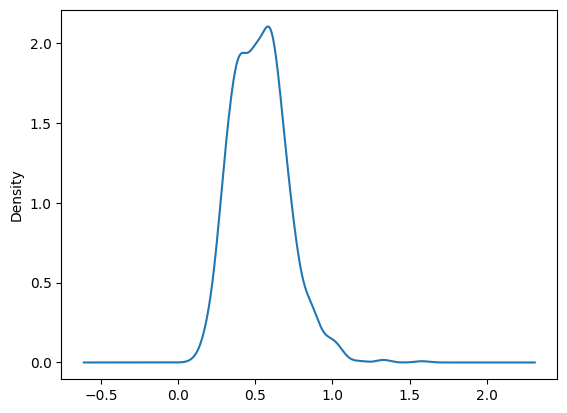

In [26]:
df['volatile acidity'].plot(kind ='kde')

In [27]:
df['volatile acidity'].skew()

np.float64(0.6815474143781255)

<Axes: >

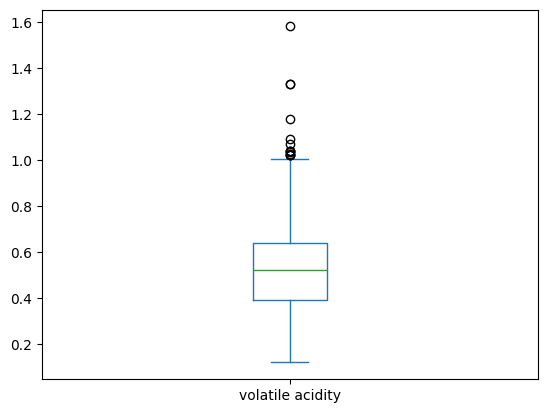

In [28]:
df['volatile acidity'].plot(kind='box')

In [29]:
b = df['volatile acidity'].mean()+df['volatile acidity'].std()*3

In [30]:
df[df['volatile acidity']>b]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
87,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5,126
88,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5,127
142,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4,199
922,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,1299
931,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5,1312


In [31]:
df['citric acid']

0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1138    0.13
1139    0.08
1140    0.08
1141    0.10
1142    0.12
Name: citric acid, Length: 1143, dtype: float64

<Axes: ylabel='Density'>

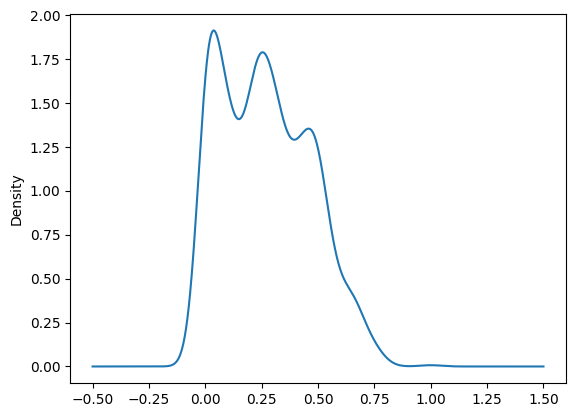

In [32]:
df['citric acid'].plot(kind='kde')

In [33]:
df['citric acid'].skew()

np.float64(0.3715607833706083)

In [34]:
df['total sulfur dioxide']

0       34.0
1       67.0
2       54.0
3       60.0
4       34.0
        ... 
1138    40.0
1139    38.0
1140    44.0
1141    51.0
1142    44.0
Name: total sulfur dioxide, Length: 1143, dtype: float64

<Axes: ylabel='Density'>

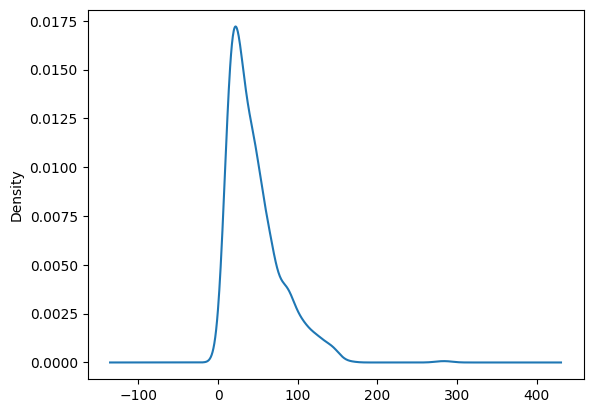

In [35]:
df['total sulfur dioxide'].plot(kind='kde')

In [36]:
df['total sulfur dioxide'].skew()

np.float64(1.6657660141342994)

In [37]:
d=df['total sulfur dioxide'].mean()+df['total sulfur dioxide'].std()*3

In [38]:
df[df['total sulfur dioxide']>d]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
249,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,354
366,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,515
421,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6,591
452,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5,636
453,9.5,0.885,0.27,2.3,0.084,31.0,145.0,0.99780,3.24,0.53,9.4,5,637
460,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6,649
485,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5,684
760,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,1079
761,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,1081
1066,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,1493


<Axes: >

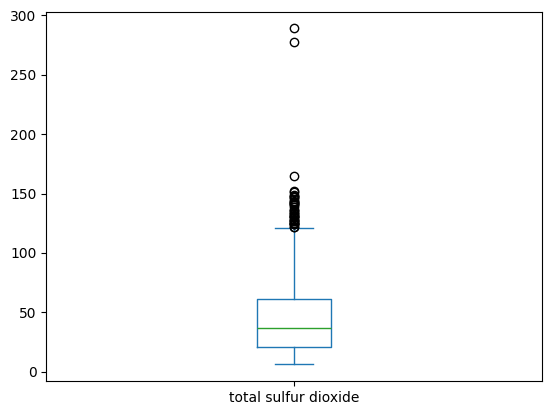

In [39]:
df['total sulfur dioxide'].plot(kind='box')

In [80]:
#DETECTING OUTLIERS WITH INTERQUARTILE RANGE METHOD
def detect_outliers_iqr(data):  #defining function 
    Q1= data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

In [81]:
outlier_counts = df.apply(detect_outliers_iqr)
outlier_counts

fixed acidity           37
volatile acidity        10
citric acid              1
residual sugar          95
chlorides               71
free sulfur dioxide     16
total sulfur dioxide    33
density                 30
pH                      24
sulphates               41
alcohol                  6
quality                 21
dtype: int64

In [82]:
#OBSERVING IF OUTLIERS FALL OUTSIDE THE RANGE

feature_ranges = {
    "fixed acidity": (6.0,8.5),
    "volatile acidity": (0.2,0.5),
    "citric acid": (0.2,0.5),
    "residual sugar": (1.5, 3.0),
    "chlorides": (0.0,0.08),
    "free sulfur dioxide":(10,35),
    "total sulfur dioxide":(50,150),
    "density": (0.990,0.996),
    "pH":(3.1,3.5),
    "sulphates":(0.5,0.9),
    "alcohol":(10.5,14)
}

In [83]:
outliers_out_of_range={}
for feature, (lower,upper) in feature_ranges.items():
    outliers = df[(df[feature] < lower) | (df[feature] > upper)][[feature,"quality"]]
    if not outliers.empty:
        outliers_out_of_range[feature] = outliers

In [84]:
outliers_df = pd.concat(outliers_out_of_range,axis=1)
outliers_df

fixed acidity         volatile acidity         citric acid          \
     fixed acidity quality volatile acidity quality citric acid quality   
3             11.2     6.0              NaN     NaN        0.56     6.0   
10             5.6     5.0            0.615     5.0        0.00     5.0   
24             5.2     5.0              NaN     NaN         NaN     NaN   
29             8.8     4.0            0.610     4.0         NaN     NaN   
32             4.6     4.0            0.520     4.0        0.15     4.0   
...            ...     ...              ...     ...         ...     ...   
810            NaN     NaN              NaN     NaN         NaN     NaN   
908            NaN     NaN              NaN     NaN         NaN     NaN   
1020           NaN     NaN              NaN     NaN         NaN     NaN   
1087           NaN     NaN              NaN     NaN         NaN     NaN   
1132           NaN     NaN              NaN     NaN         NaN     NaN   

     residual sugar         chlorides          ... total sulfur dioxide  \
     residual sugar quality chlorides quality  ... total sulfur dioxide   
3               NaN     NaN       NaN     NaN  ...                  NaN   
10              NaN     NaN     0.089     5.0  ...                  NaN   
24              NaN     NaN     0.103     5.0  ...                  NaN   
29              NaN     NaN     0.088     4.0  ...                 46.0   
32              NaN     NaN       NaN     NaN  ...                  NaN   
...             ...     ...       ...     ...  ...                  ...   
810             NaN     NaN       NaN     NaN  ...                  NaN   
908             NaN     NaN       NaN     NaN  ...                  NaN   
1020            NaN     NaN       NaN     NaN  ...                  NaN   
1087            NaN     NaN       NaN     NaN  ...                  NaN   
1132            NaN     NaN       NaN     NaN  ...                  NaN   

             density            pH         sulphates         alcohol          
     quality density quality    pH quality sulphates quality alcohol quality  
3        NaN  0.9980     6.0   NaN     NaN       NaN     NaN     9.8     6.0  
10       NaN     NaN     NaN  3.58     5.0       NaN     NaN     9.9     5.0  
24       NaN     NaN     NaN   NaN     NaN       NaN     NaN     9.2     5.0  
29       4.0  0.9976     4.0   NaN     NaN       NaN     NaN     9.3     4.0  
32       NaN     NaN     NaN  3.90     4.0       NaN     NaN     NaN     NaN  
...      ...     ...     ...   ...     ...       ...     ...     ...     ...  
810      NaN     NaN     NaN   NaN     NaN       NaN     NaN    10.1     5.0  
908      NaN     NaN     NaN   NaN     NaN       NaN     NaN    10.4     6.0  
1020     NaN     NaN     NaN   NaN     NaN       NaN     NaN     9.9     6.0  
1087     NaN     NaN     NaN   NaN     NaN       NaN     NaN    10.4     5.0  
1132     NaN     NaN     NaN   NaN     NaN       NaN     NaN     9.8     5.0  

[1011 rows x 22 columns]

UNIVARIATE ANALYSIS

In [86]:
def univariate_analysis(df):
    fig,axes = plt.subplots(nrows = len(df.columns), ncols=2, figsize=(12,50))
    for i, col in enumerate(df.columns):
        sns.histplot(df[col],bins=30,kde=True,ax=axes[i,0])
        axes[i,0].set_title(f"Histogram of {col}")
        sns.boxplot(x=df[col],ax=axes[i,1])
        axes[i,1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

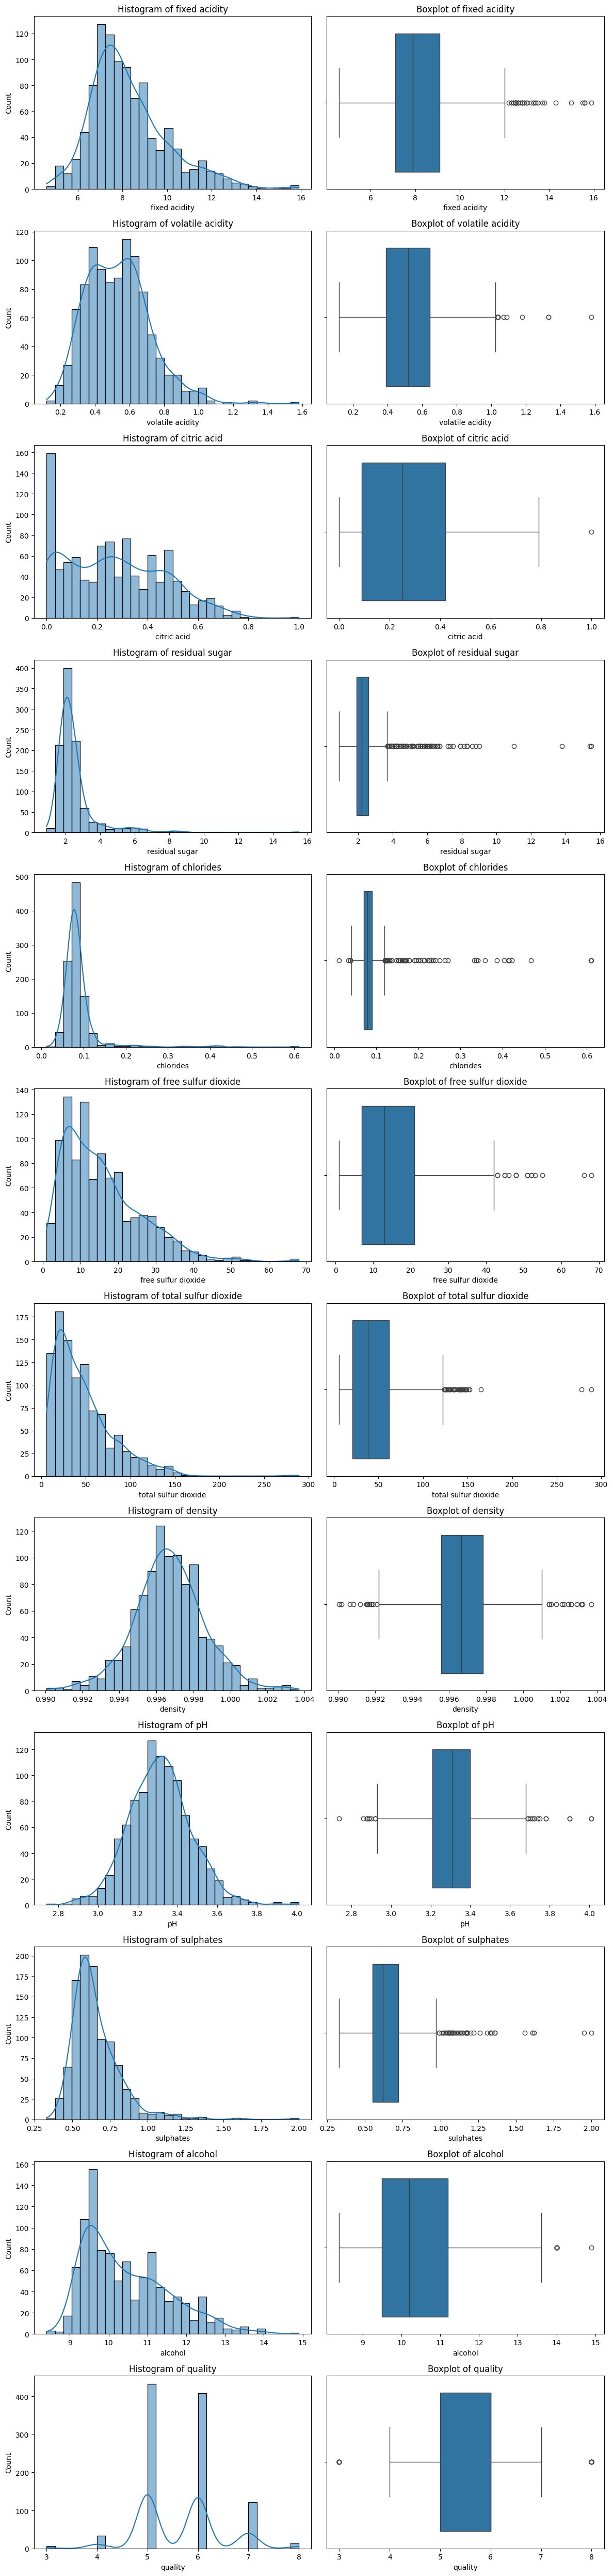

In [87]:
univariate_analysis(df)

BIVARIATE ANALYSIS

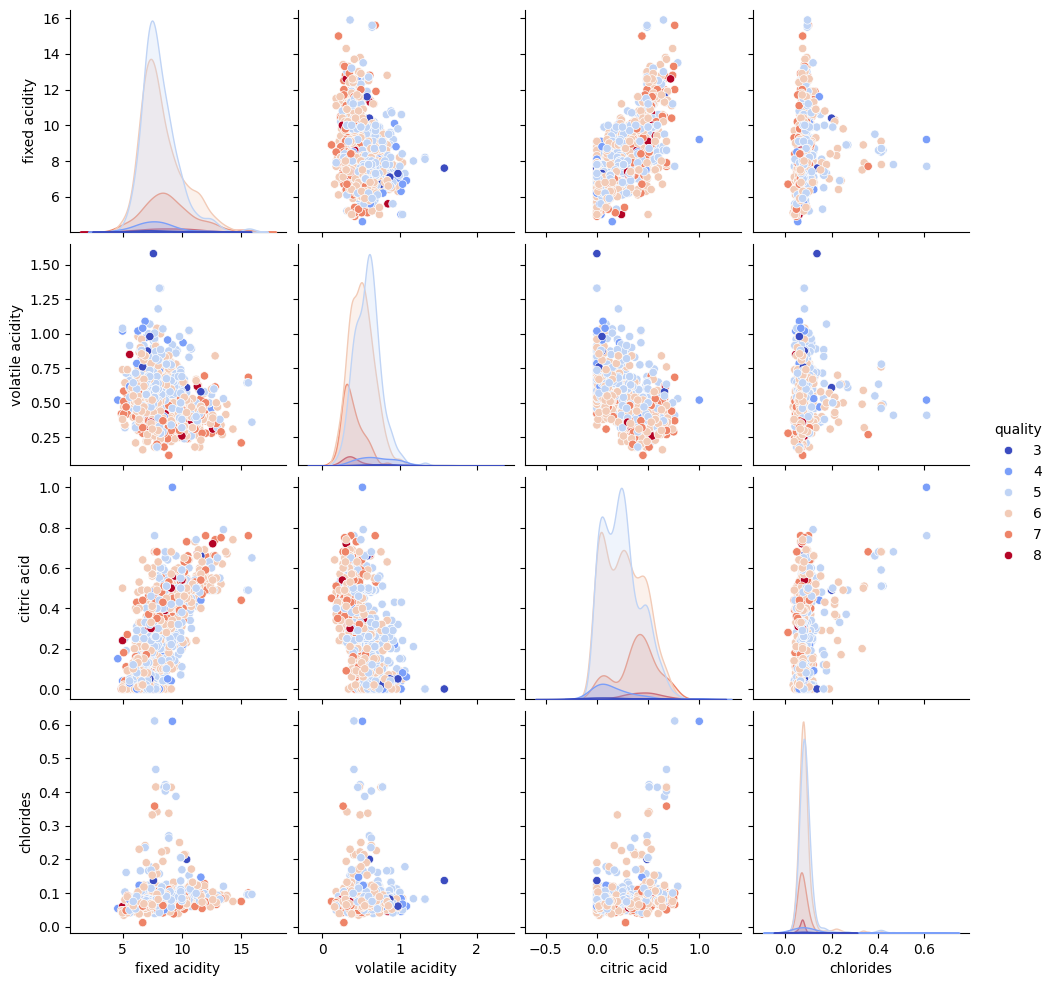

In [41]:
sns.pairplot(df,vars=['fixed acidity','volatile acidity','citric acid','chlorides'],hue='quality',palette ='coolwarm')
plt.show()

In [42]:
df.groupby('quality')[['fixed acidity']].mean()

,fixed acidity
quality,
3,8.450000
4,7.809091
5,8.161077
6,8.317749
7,8.851049
8,8.806250


In [43]:
df.groupby('quality')[['volatile acidity']].mean()

,volatile acidity
quality,
3,0.897500
4,0.700000
5,0.585280
6,0.504957
7,0.393671
8,0.410000


In [44]:
df.groupby('quality')[['residual sugar']].mean()

,residual sugar
quality,
3,2.666667
4,2.566667
5,2.540476
6,2.444805
7,2.760140
8,2.643750


In [45]:
df.groupby('quality')[['pH']].mean()

,pH
quality,
3,3.361667
4,3.391212
5,3.302091
6,3.323788
7,3.287133
8,3.240625


In [46]:
df.groupby('quality')[['alcohol']].mean()

,alcohol
quality,
3,9.691667
4,10.260606
5,9.902277
6,10.655339
7,11.482634
8,11.937500


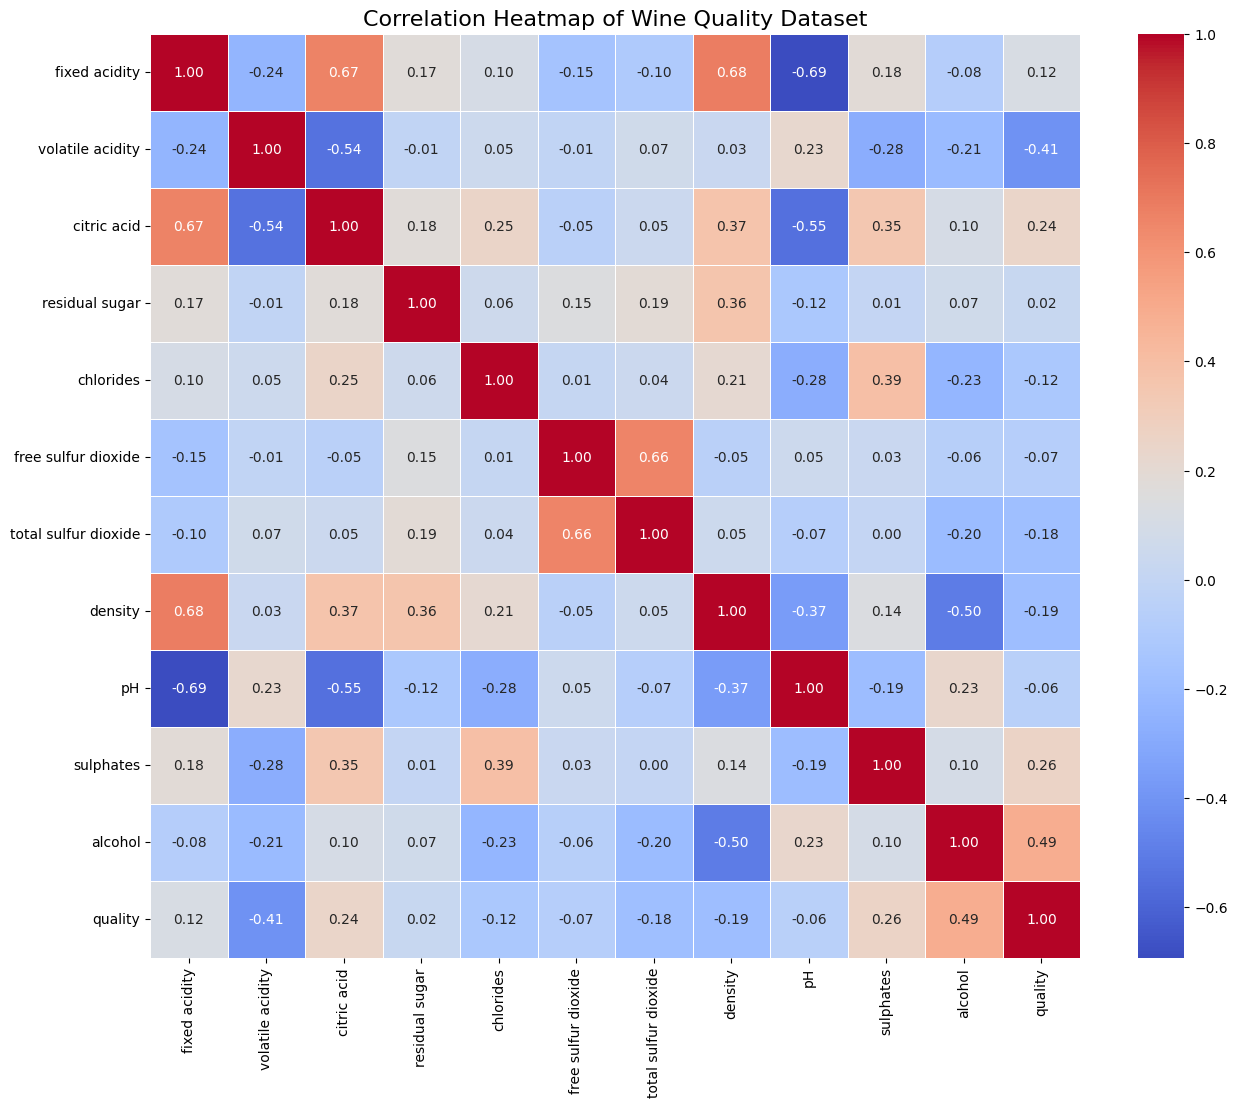

In [36]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),annot= True, cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title("Correlation Heatmap of Wine Quality Dataset", fontsize=16)
plt.show()

MULTIVARIATE ANALYSIS

In [149]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['quality']))

In [150]:
pca = PCA (n_components=2)

In [151]:
pca_result = pca.fit_transform(df_scaled)

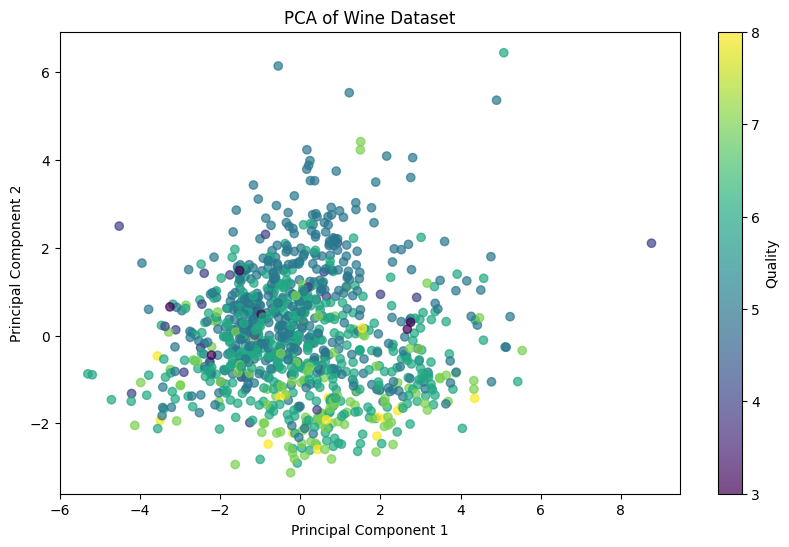

In [153]:
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['quality'],cmap="viridis",alpha=0.7)
plt.colorbar(label="Quality")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.show()

MACHINE LEARNING MODEL [CLASSIFICATION]

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [154]:
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

In [158]:
X = df.drop(columns = ['quality'],axis=1).values
y = df.quality.values

In [171]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size =0.2, random_state=42)

In [173]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [174]:
y_pred = model.predict(X_test)
y_pred

array([5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 7, 6])

In [175]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

51.470588235294116

In [176]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.61      0.71      0.66        84
           6       0.43      0.58      0.49        74
           7       0.50      0.08      0.14        25
           8       0.00      0.00      0.00         7

    accuracy                           0.51       204
   macro avg       0.26      0.23      0.21       204
weighted avg       0.47      0.51      0.47       204



[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  7 60 30  0  0]
 [ 0  5 24 43 23  6]
 [ 0  0  0  1  2  1]
 [ 0  0  0  0  0  0]]


<Axes: >

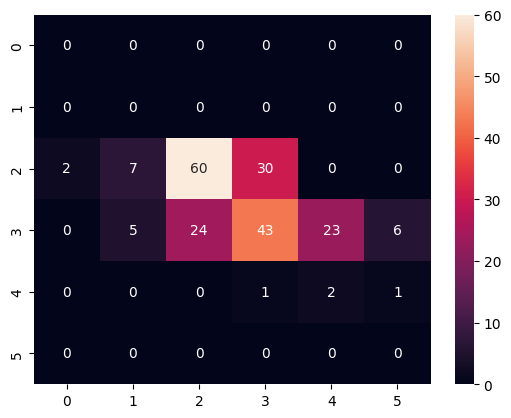

In [177]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred , y_test)
print(cm)
sns.heatmap(cm , annot = True)

RANDOM FOREST 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
X = df.drop(columns=['quality'])
y = df['quality']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [111]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

In [112]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
y_pred = rf_classifier.predict(X_test)

In [114]:
y_pred

array([6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 7, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5,
       7, 6, 7, 6, 7, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 7, 6, 5, 7, 5, 6,
       5, 6, 5, 6, 7, 6, 6, 6, 8, 5, 5, 6, 6, 5, 6, 6, 7, 5, 6, 5, 5, 5,
       5, 5, 7, 6, 5, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 7, 7, 6, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 5, 4, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 6, 5])

In [115]:
accuracy = accuracy_score(y_test,y_pred)*100
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy: 57.35
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.62      0.63        87
           6       0.54      0.63      0.58        82
           7       0.52      0.46      0.49        24
           8       0.00      0.00      0.00         3

    accuracy                           0.57       204
   macro avg       0.28      0.29      0.28       204
weighted avg       0.55      0.57      0.56       204



[[ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 1  4 54 23  2  0]
 [ 0  3 31 52 10  1]
 [ 0  0  2  6 11  2]
 [ 0  0  0  0  1  0]]


<Axes: >

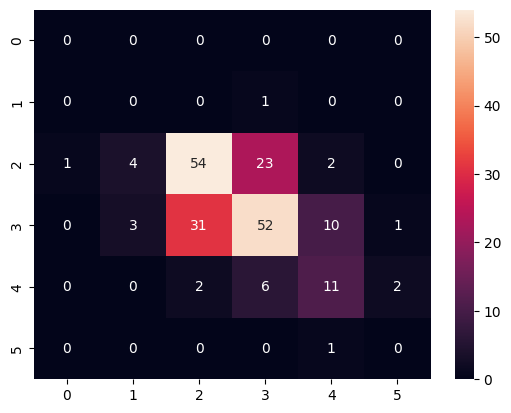

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred , y_test)
print(cm)
sns.heatmap(cm , annot = True)

SUPPORT VECTOR MACHINE

In [160]:
from sklearn.svm import SVC 

In [161]:
X = df.drop (columns=['quality'])
y = df['quality']

In [162]:
scaler = MinMaxScaler()
X_scaled - scaler.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1018, 11))

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [178]:
svm_clf = SVC(kernel ='rbf', C=1, gamma='scale',random_state=42)
svm_clf.fit(X_train,y_train)

SVC(C=1, random_state=42)

In [180]:
y_pred_svm = svm_clf.predict(X_test)

In [181]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.5196078431372549

In [182]:
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Classification Report (SVM):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.64      0.69      0.66        84
           6       0.43      0.65      0.52        74
           7       0.00      0.00      0.00        25
           8       0.00      0.00      0.00         7

    accuracy                           0.52       204
   macro avg       0.18      0.22      0.20       204
weighted avg       0.42      0.52      0.46       204



[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  6 58 25  0  0]
 [ 0  6 26 48 25  7]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]]


<Axes: >

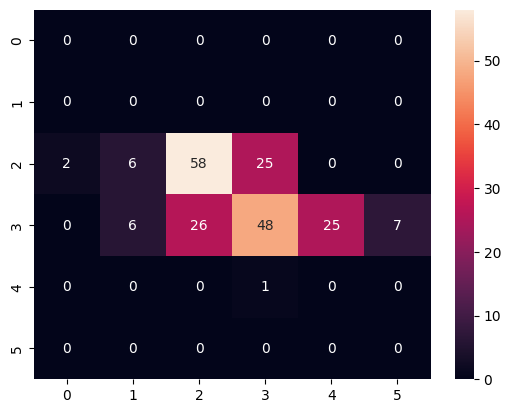

In [188]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred_svm , y_test)
print(cm)
sns.heatmap(cm , annot = True)